In [35]:
import os
import logging
import os.path as op
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from nilearn.datasets import fetch_atlas_schaefer_2018
from nilearn import plotting
from nilearn._utils import check_niimg
from nilearn.input_data import NiftiLabelsMasker

In [4]:
schaefer = fetch_atlas_schaefer_2018(n_rois=1000)

 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


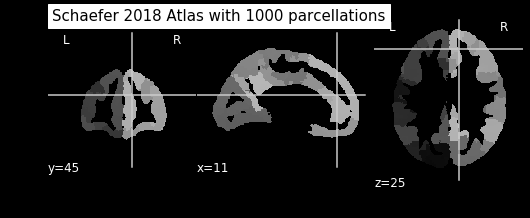

In [21]:
plotting.plot_anat(schaefer.maps, title = "Schaefer 2018 Atlas with 1000 parcellations")
plt.show()

In [36]:
subj_path = '/DATA/doeringe/Dokumente/BrainAge/3_SUVR/'

# List all the subjects in subj_path
subjects = os.listdir(subj_path)

# Read the nifti/img file
#images = []
read_subjects = []
 
for subject in subjects:
    s_path = op.join(subj_path, subject)
    # read all subjects with selected keyword 
    #if (what == '_s2'):
    #    foi = op.join(s_path, '*mod', what + '*.nii*')
    #    files = glob(foi)
    read_subjects.append(s_path)

logging.info(
    "Reading subjects' volume. Total number of subjects: {}"
    .format(len(read_subjects)))



image_list = []
for subj in read_subjects:
        this_image = nib.load(subj)
        niimg = check_niimg(this_image, atleast_4d=True)
        masker = NiftiLabelsMasker(labels_img=schaefer.maps,
                                   standardize=False,
                                   memory='nilearn_cache',
                                   resampling_target='data')
        parcelled = masker.fit_transform(niimg)
        image_list.append(parcelled)

# Get only the data for the subjects in the list

cols = list(range(image_list[0].shape[1]))
df = pd.DataFrame(np.vstack(image_list), columns=cols)
#t_df = df[df['participant_id'].isin(exist_subj)]
df.to_csv(op.join(subj_path, "OASIS_Schaefer_parcellation.csv"))